In [6]:
from diffusers import StableDiffusionPipeline
from diffusers import StableDiffusionXLPipeline
from peft import get_peft_model, LoraConfig
import torch


## Load Pretrained Stable Diffusion Model

In [7]:

# Load the base SDXL model
pipe = StableDiffusionXLPipeline.from_pretrained(
    "stabilityai/stable-diffusion-xl-base-1.0",
    torch_dtype=torch.float16,
    variant="fp16",
    use_safetensors=True
).to("cuda")




Loading pipeline components...:   0%|          | 0/7 [00:00<?, ?it/s]

Loading pipeline components...: 100%|██████████| 7/7 [00:00<00:00, 11.65it/s]


OutOfMemoryError: CUDA out of memory. Tried to allocate 20.00 MiB. GPU 0 has a total capacity of 23.57 GiB of which 12.56 MiB is free. Process 3390025 has 7.74 GiB memory in use. Process 3387205 has 15.80 GiB memory in use. Of the allocated memory 7.26 GiB is allocated by PyTorch, and 179.00 MiB is reserved by PyTorch but unallocated. If reserved but unallocated memory is large try setting PYTORCH_CUDA_ALLOC_CONF=expandable_segments:True to avoid fragmentation.  See documentation for Memory Management  (https://pytorch.org/docs/stable/notes/cuda.html#environment-variables)

100%|██████████| 50/50 [00:02<00:00, 19.13it/s]


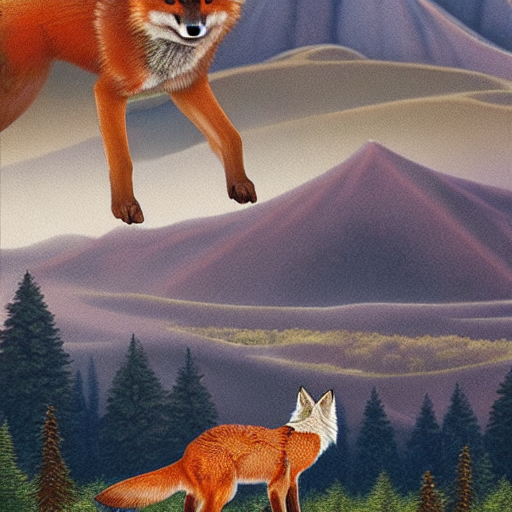

In [5]:
# Generate an image from a prompt
prompt = "a mountain landscape with a river and a fox in the foreground, highly detailed, photorealistic"
image_1 = pipe(prompt, guidance_scale=7.5).images[0]

# Save the image
image_1


## Configure LoRA for Fine-Tuning

In [ ]:
pipe.load_lora_weights(
    "peft-internal-testing/artificialguybr__3DRedmond-V1",
    weight_name="3DRedmond-3DRenderStyle-3DRenderAF.safetensors",
    adapter_name="3d"
)

In [ ]:
image_2=pipe("A cat likes a human that take a cup of coffe in Melbourne CBD").images[0]
image_2

In [ ]:
# Changed to a new adapter

In [ ]:
pipe.load_lora_weights(
    "ostris/super-cereal-sdxl-lora",
    weight_name="cereal_box_sdxl_v1.safetensors",
    adapter_name="cereal"
)

pipe.set_adapters("cereal")

In [ ]:
image_3=pipe("A cat likes a human take a cup of coffe in Melbourne CBD").images[0]
image_3